# Load the Libraries and Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Palmer Penguins dataset
df = sns.load_dataset('penguins')

In [6]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Basic Dataset Information

In [7]:
# Display basic information about the dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550

# Visualize Distribution : Bill Length Distribution

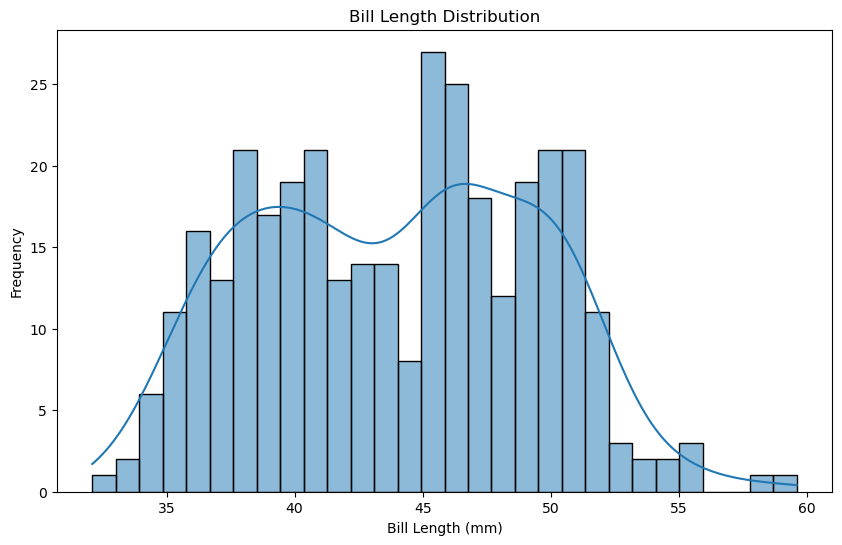

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bill_length_mm'].dropna(), kde=True, bins=30)
plt.title('Bill Length Distribution')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()


# Body Mass Distribution

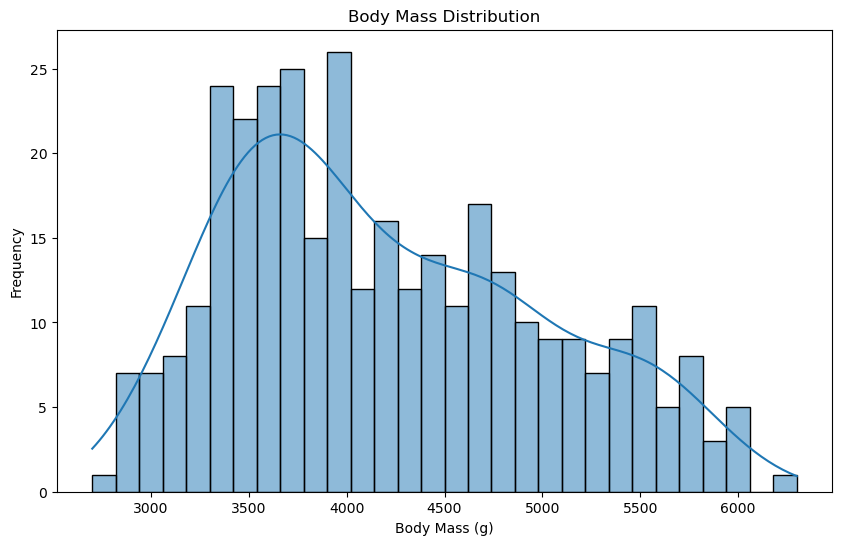

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['body_mass_g'].dropna(), kde=True, bins=30)
plt.title('Body Mass Distribution')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Display missing values
print(df.isnull().sum())

# Drop rows with missing values for simplicity
df_clean = df.dropna()
print(df_clean.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# Bill Length and Depth

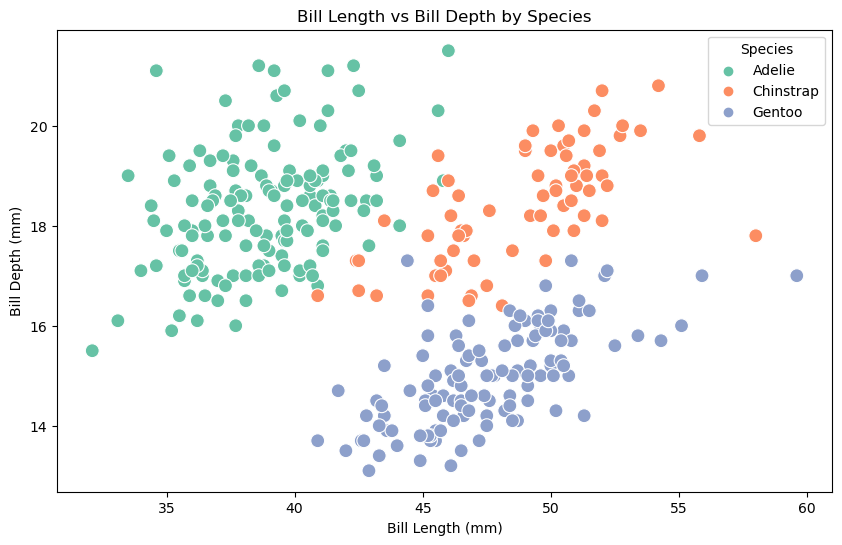

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_clean, palette='Set2', s=100)
plt.title('Bill Length vs Bill Depth by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species')
plt.show()


# Flipper Length Distribution by Species

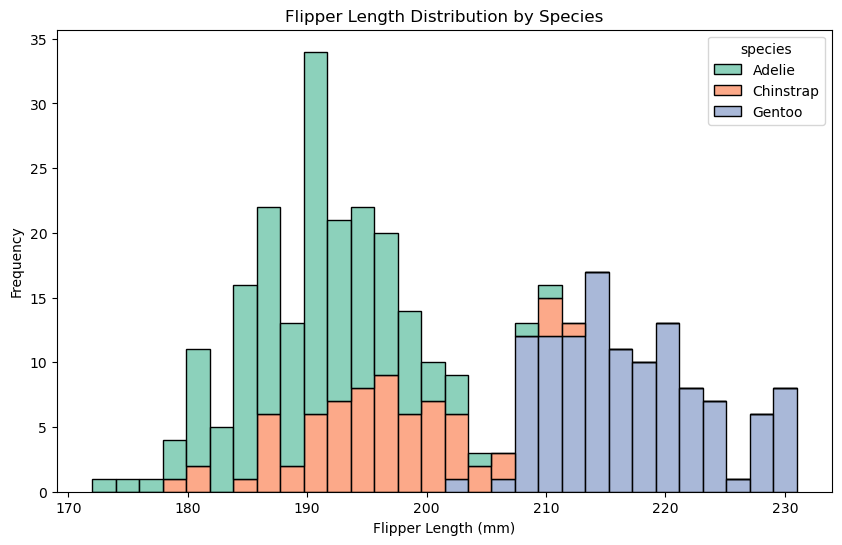

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='flipper_length_mm', hue='species', multiple='stack', palette='Set2', bins=30)
plt.title('Flipper Length Distribution by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.show()


# Bill Length vs Flipper Length

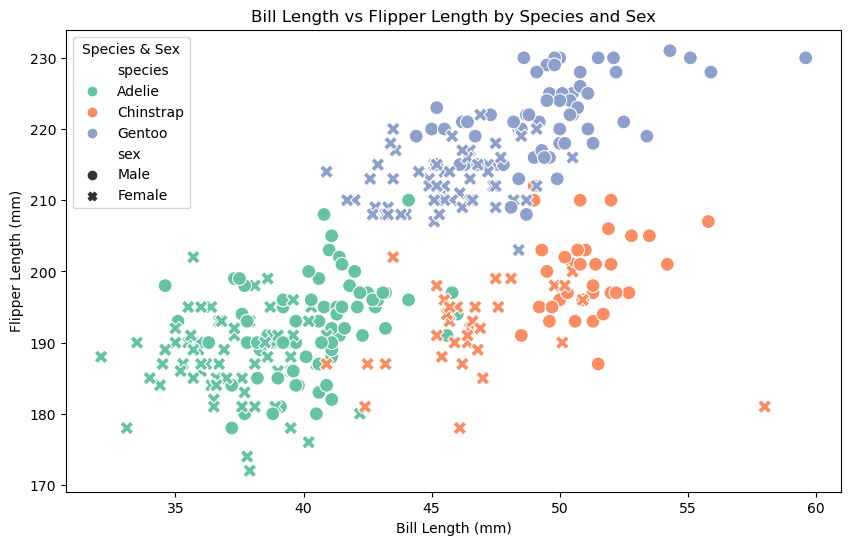

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', style='sex', data=df_clean, palette='Set2', s=100)
plt.title('Bill Length vs Flipper Length by Species and Sex')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species & Sex')
plt.show()


# Bill Length by Island and Species

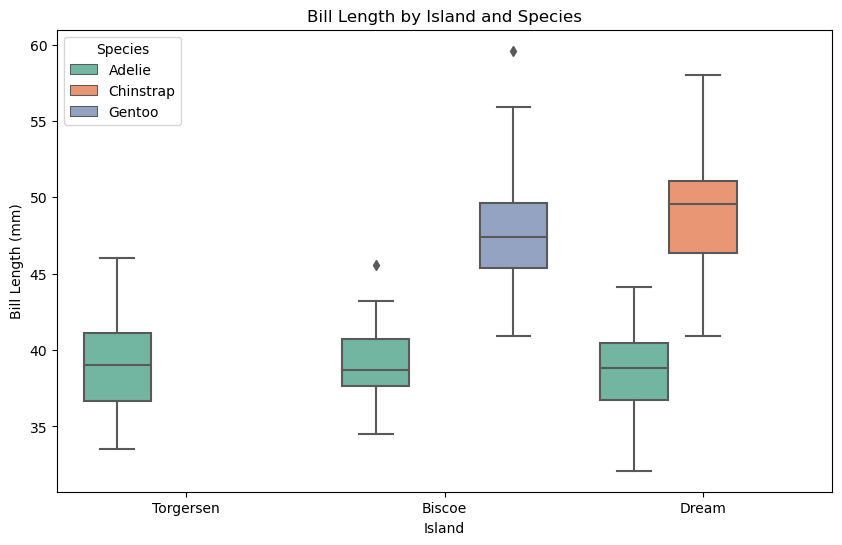

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='island', y='bill_length_mm', hue='species', data=df_clean, palette='Set2')
plt.title('Bill Length by Island and Species')
plt.xlabel('Island')
plt.ylabel('Bill Length (mm)')
plt.legend(title='Species')
plt.show()


#  Explore Categorical Features

# Species Count

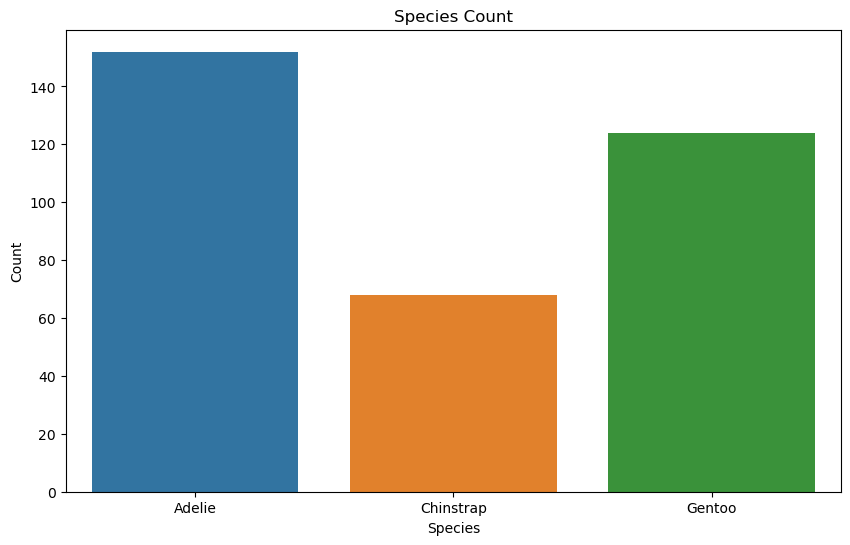

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df)
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


# Species by Island

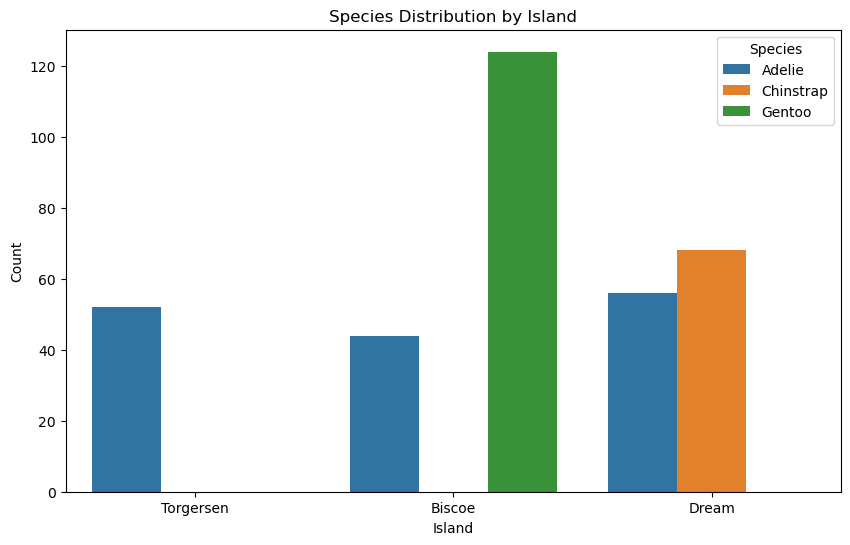

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species', data=df)
plt.title('Species Distribution by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.legend(title='Species')
plt.show()


# Correlation and Heatmap

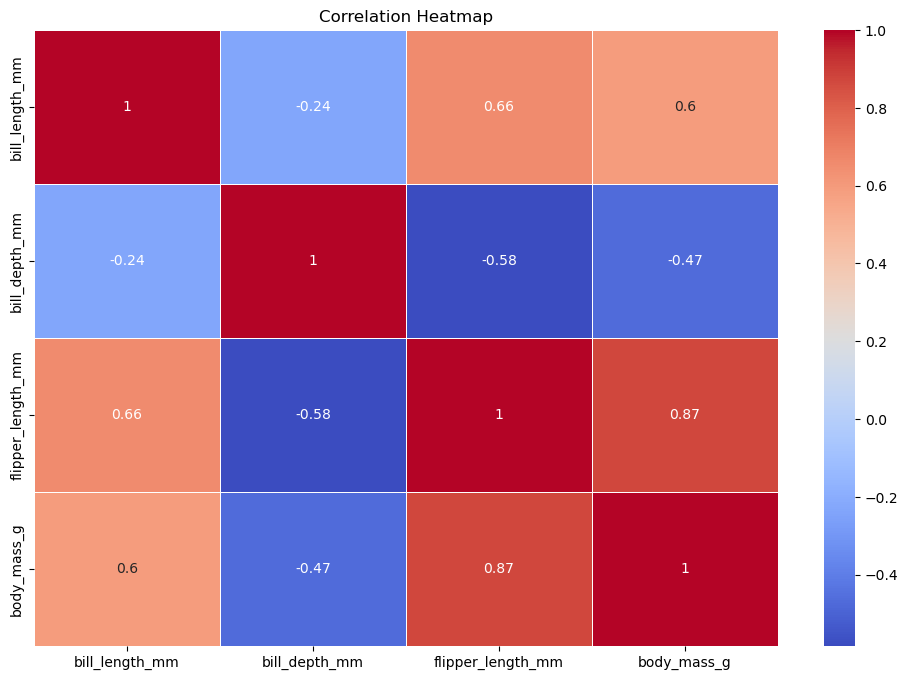

In [19]:
plt.figure(figsize=(12, 8))
corr_matrix = df.drop(columns=['species', 'island', 'sex']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Pairplot for All Features

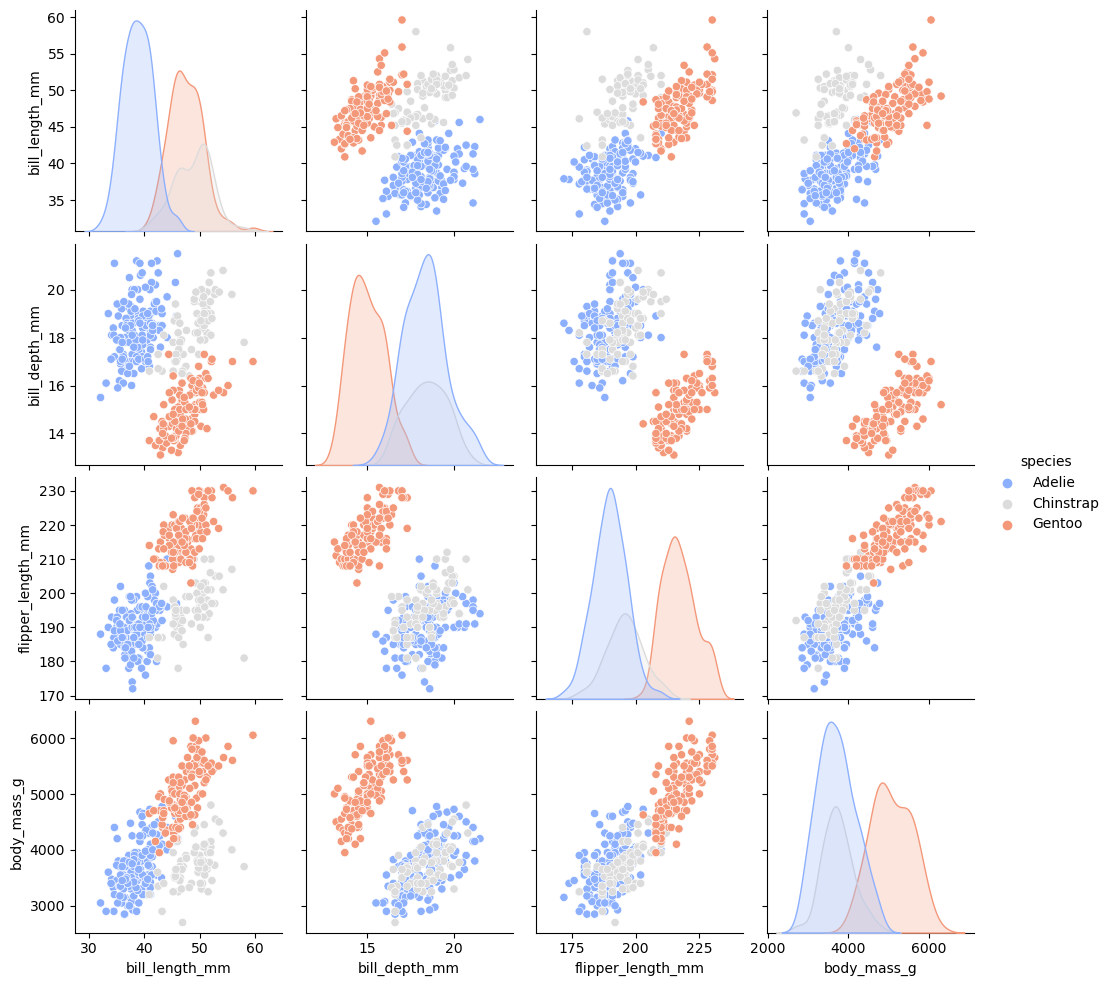

In [22]:
sns.pairplot(df, hue='species', palette='coolwarm')
plt.show()

# Pairplot with Hue for Species and Sex

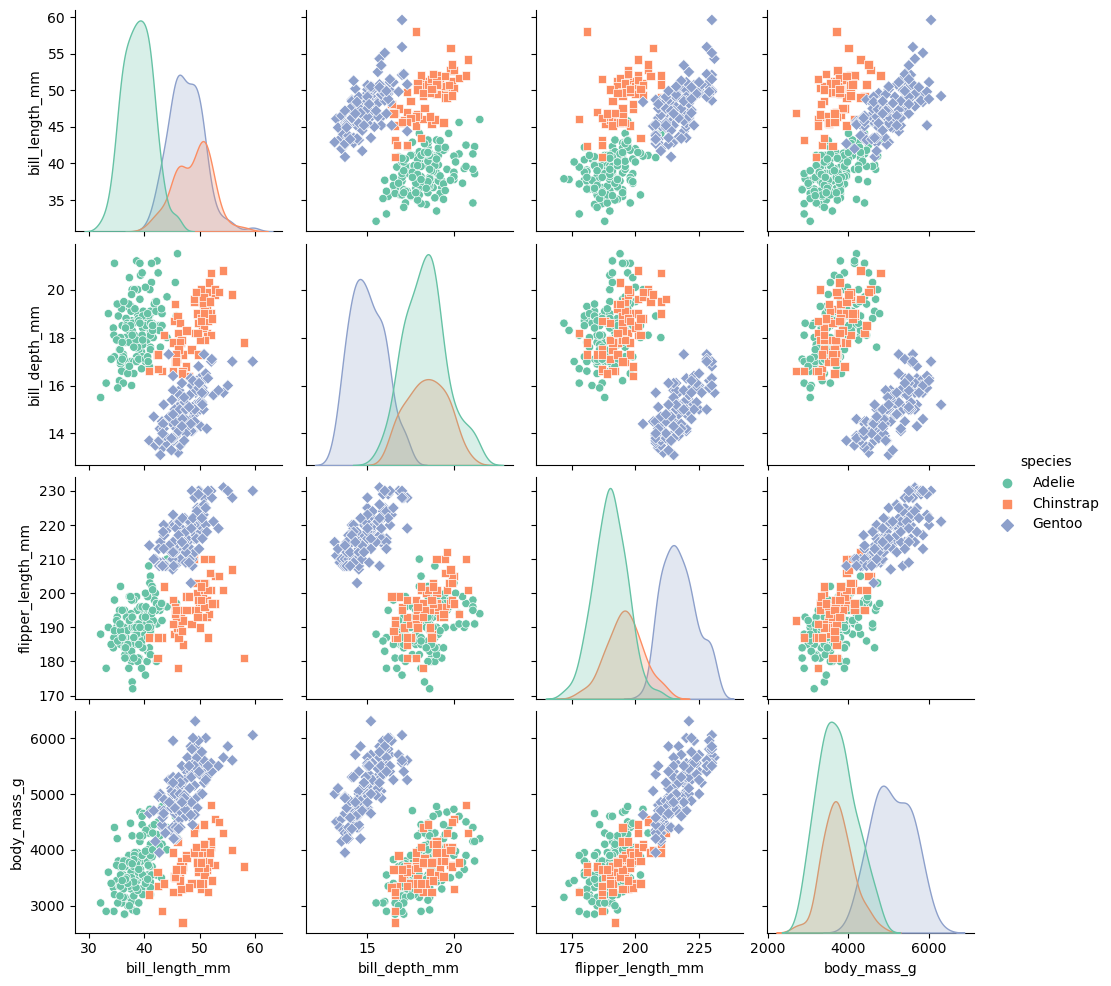

In [23]:
sns.pairplot(df_clean, hue='species', palette='Set2', markers=["o", "s", "D"], diag_kind="kde", height=2.5)
plt.show()


# Violin Plots for Body Mass by Species and Sex

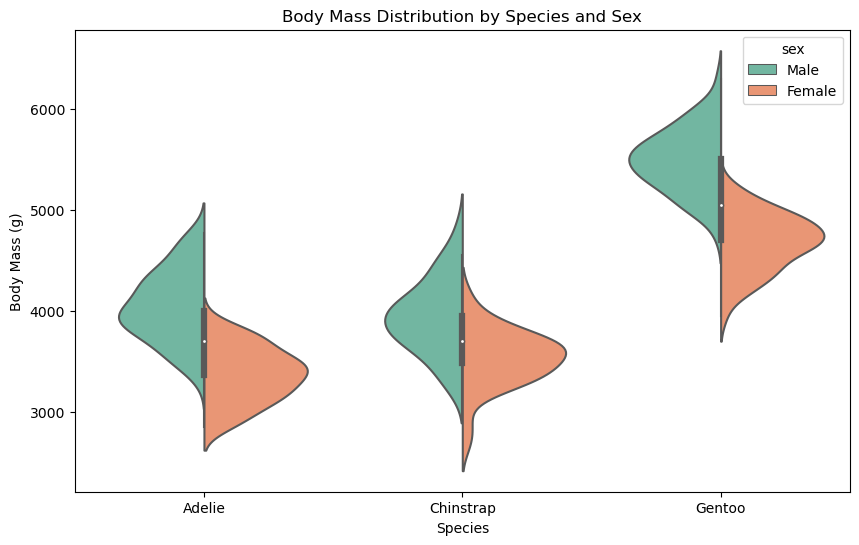

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='body_mass_g', hue='sex', data=df_clean, split=True, palette='Set2')
plt.title('Body Mass Distribution by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()


# KDE Plot for Flipper Length

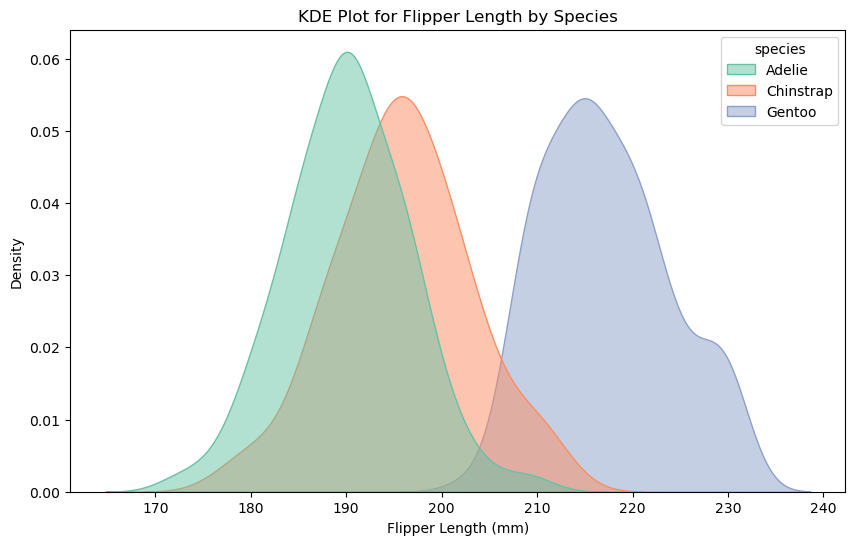

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean, x='flipper_length_mm', hue='species', fill=True, common_norm=False, palette='Set2', alpha=0.5)
plt.title('KDE Plot for Flipper Length by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Density')
plt.show()


# Pairwise Relationships with Regression Lines

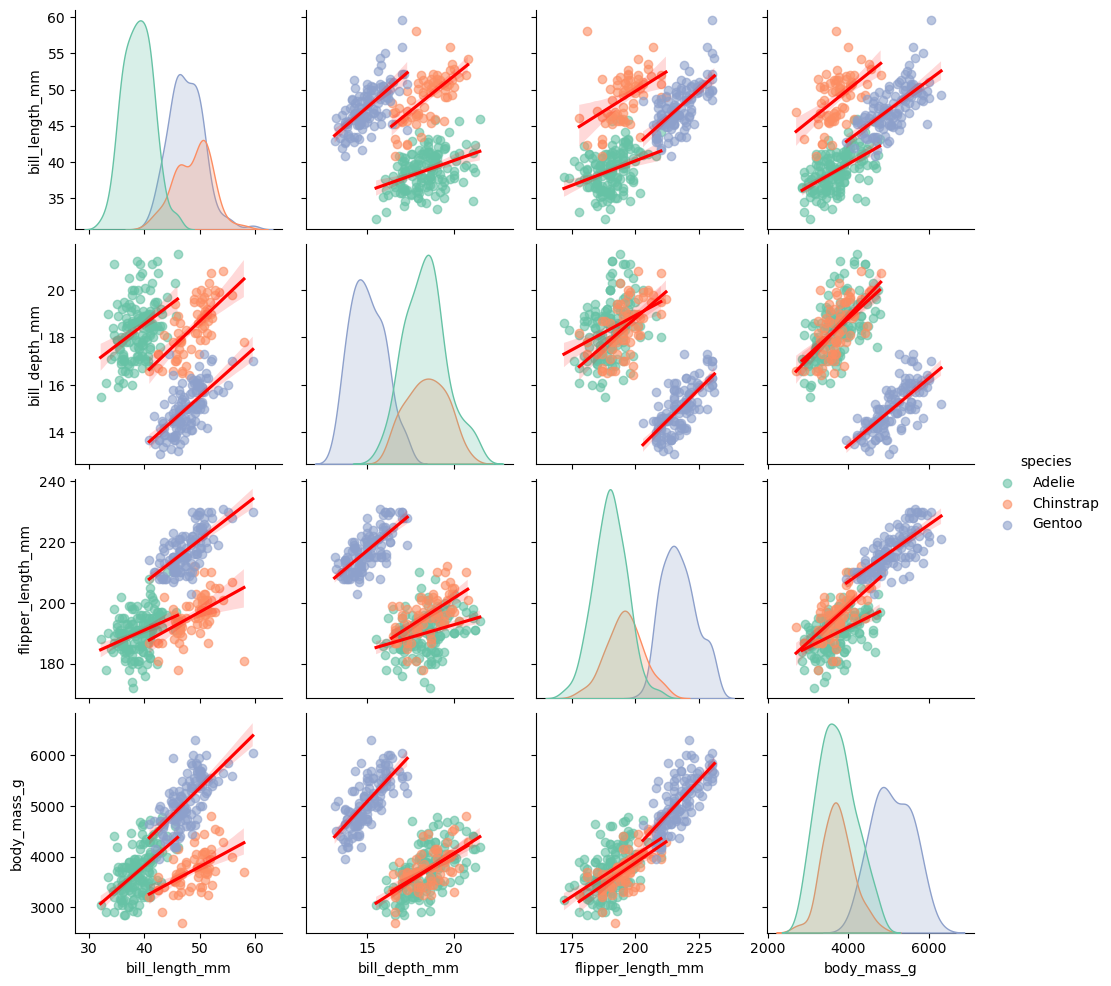

In [30]:
sns.pairplot(df_clean, hue='species', palette='Set2', kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.show()


# Additional Insights from Subgroup Analyses

# Body Mass by Sex within Each Species

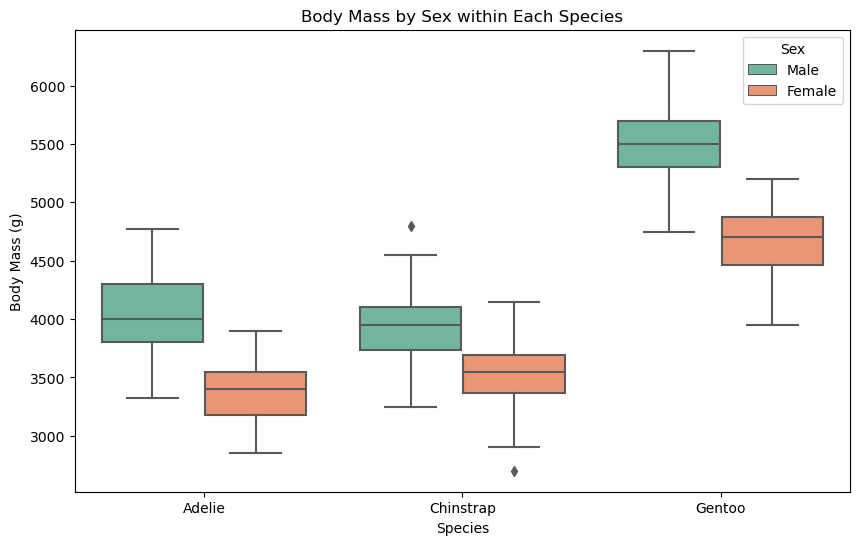

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=df_clean, palette='Set2')
plt.title('Body Mass by Sex within Each Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.legend(title='Sex')
plt.show()
